In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Prepare Data (Fusion Mnist)
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)


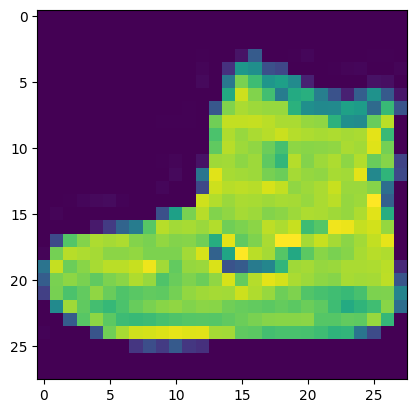

In [ ]:
print(x_train.shape)
plt.imshow(x_train[0])

In [ ]:
cols_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

x_train = x_train.reshape(60000,28,28,1).astype('float32')/255
x_test = x_test.reshape(10000,28,28,1).astype('float32')/255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = tf.keras.models.Sequential()
# CNN Archticure
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
#DNN
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 6ms/step - loss: 0.8698 - accuracy: 0.6747 - val_loss: 0.6326 - val_accuracy: 0.7584
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5575 - accuracy: 0.7895 - val_loss: 0.5275 - val_accuracy: 0.8039
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4940 - accuracy: 0.8175 - val_loss: 0.4937 - val_accuracy: 0.8212
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4538 - accuracy: 0.8332 - val_loss: 0.4587 - val_accuracy: 0.8354
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4230 - accuracy: 0.8460 - val_loss: 0.4339 - val_accuracy: 0.8441
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3985 - accuracy: 0.8559 - val_loss: 0.4171 - val_accuracy: 0.8514
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3797 - accuracy: 0.8637 - val_loss: 0.3892 - val_accurac

In [ ]:
loss,acc = model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3709 - accuracy: 0.8674


In [ ]:
pred = model.predict(x_test)
print(pred[0])

313/313 [==============================] - 1s 2ms/step
[5.1804791e-06 3.8006218e-07 1.8072426e-07 7.5716486e-07 1.7257480e-07
 1.0338466e-02 3.0626528e-05 1.5196344e-02 1.5224303e-03 9.7290546e-01]


In [ ]:
print(np.argmax(pred[0]))

9


Pullover


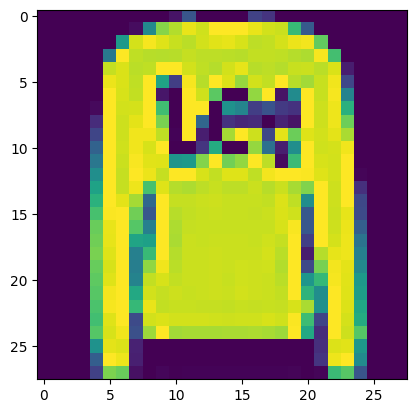

In [ ]:
z = np.argmax(pred[1])
print(cols_name[z])
plt.imshow(x_test[1])

In [ ]:
input = input("Image Number:")
z = np.argmax(pred[int(input)])
print(cols_name[z])
plt.imshow(x_test[int(input)])